# NGC Time Series 

This notebook is contain of the maulana's work about Non Graded Challenge (NGC) relating to time series. 

# Introduction 
I am as a data analyst at a leading cinema brand in Indonesia. The management has given a task for you to predict the total sold ticket (total of all movies) per day for a week. Your prediction will be used as a baseline for the distribution of the Food and Beverage stock management. Therefore your prediction will be background for the stocking team to refill their inventory.  
Model akan dilakukan uji evaluasi model dengan menggunakan metriks MAE yaitu mean absolute error. 


# Importing Library 

In [39]:
# Load Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Decomposition of time-series graph
import pylab
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

import pickle

Import neccesary libraries

# Loading Dataset

In [40]:
# Load dataset

df = pd.read_csv(r'C:\Users\asanm\Hacktiv8\fase1\W3\NGC_timeseries\archive (2)\cinemaTicket_Ref.csv')
df.tail()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4
142523,1569,486,250000,5,0,1,1.79,50000.0,5,279.329609,2018-11-04,11,4,4


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


Masih terdapat beberapa missing value. terlihat ini mempunyai 142524 baris dan 14 kolom. terdapat film kode cinema kode dan total sales. kita akan memprediksi tickets sold untuk mengetahui bagaimana penjualan dari tiketing tersebut. 

In [42]:
df.duplicated().sum()

106

Masih terdapat 106 data duplikat

In [43]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Duplikat sudah menjadi 0 dan bisa lanjut ke missing value 

In [44]:
df.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       123
ticket_price      0
ticket_use        0
capacity        123
date              0
month             0
quarter           0
day               0
dtype: int64

Masih terdapat 125 data missing value. Jika kita lihat sekilas itu seperti occupation percentage yang mana jumlah okupansi dan capacity. karena 2 itu sama maka bisa dibilang 2 itu harusnya tidak perlu dihandle cuma perlu di diisi 0 saja. kita perlu lihat lebih jelas. 

In [45]:
# Display rows that contain any NaN values
df[df.isna().any(axis=1)]

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
8691,1498,181,900000,13,0,3,NaN,69230.769231,13,NaN,2018-08-25,8,3,25
9773,1498,514,2720000,34,0,4,NaN,80000.000000,34,NaN,2018-08-08,8,3,8
9898,1498,477,550000,22,0,1,NaN,25000.000000,22,NaN,2018-08-07,8,3,7
21923,1511,273,250000,5,0,1,NaN,50000.000000,5,NaN,2018-08-11,8,3,11
21972,1511,273,150000,3,0,1,NaN,50000.000000,3,NaN,2018-08-09,8,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138287,1556,543,300000,6,0,1,NaN,50000.000000,6,NaN,2018-09-07,9,3,7
138438,1556,543,150000,3,0,1,NaN,50000.000000,3,NaN,2018-09-06,9,3,6
138570,1556,543,100000,2,0,1,NaN,50000.000000,2,NaN,2018-09-05,9,3,5
138703,1556,543,500000,10,0,1,NaN,50000.000000,10,NaN,2018-09-04,9,3,4


missing value tidak terjadi pada target maka ini harusnya dibiarkan saja karena memang adanya kesalahan human error sepertinya. 

In [46]:
df.sample(20)

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
75103,1552,534,200000,5,0,3,3.27,40000.000000,5,152.905199,2018-07-31,7,3,31
134047,1493,511,2600000,52,0,1,17.33,50000.000000,52,300.057703,2018-07-15,7,3,15
119028,1481,368,3950000,79,0,1,21.35,50000.000000,79,370.023419,2018-04-22,4,2,22
66005,1571,181,160000,2,0,2,0.67,80000.000000,2,298.507463,2018-10-21,10,4,21
130775,1493,88,12100000,121,0,8,7.60,100000.000000,121,1592.105263,2018-05-03,5,2,3
108910,1482,432,4160000,104,0,2,17.05,40000.000000,104,609.970674,2018-05-01,5,2,1
49635,1559,39,3180000,28,0,3,5.43,113571.428571,28,515.653775,2018-08-16,8,3,16
3314,1497,474,6880000,106,0,3,36.43,64905.660377,106,290.968982,2018-06-10,6,2,10
71434,1483,34,78400000,784,0,7,24.89,100000.000000,784,3149.859381,2018-03-23,3,1,23
107352,1482,158,1400000,20,0,4,1.67,70000.000000,20,1197.604790,2018-05-19,5,2,19


# EDA 

In [47]:
# set day into index (membuat day menjadi index)
df1 = df.set_index('date')['tickets_sold']
df1.index = pd.to_datetime(df1.index)
df1 = pd.DataFrame(df1)

# show dataframe
df1.head()

,tickets_sold
date,
2018-05-05,26
2018-05-05,42
2018-05-05,32
2018-05-05,12
2018-05-05,15


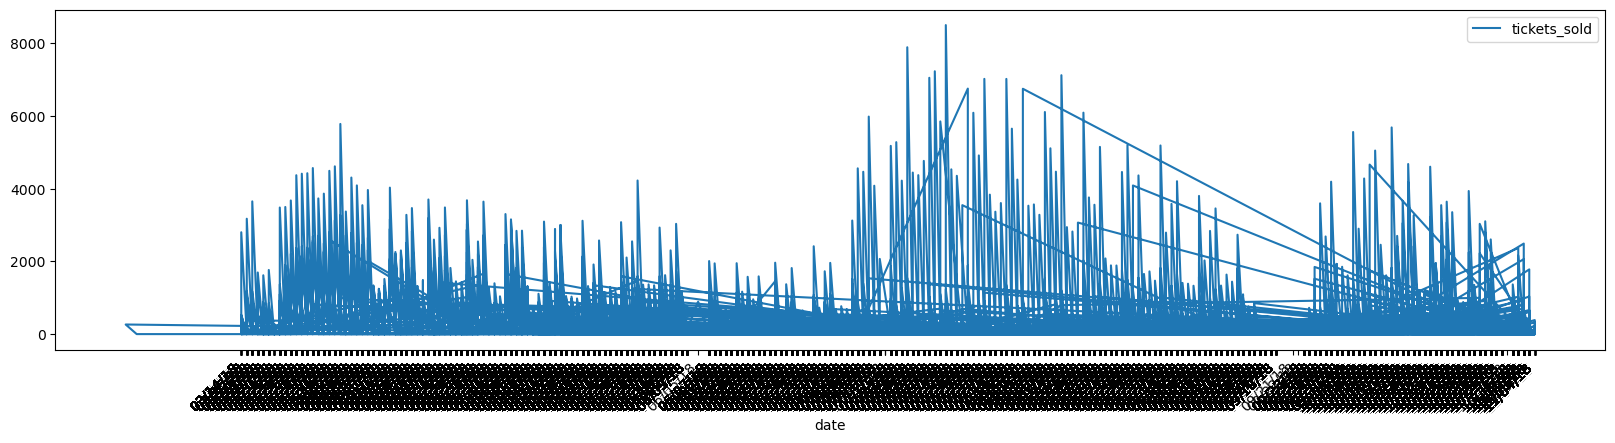

In [48]:
# Plot a time-series graph
df1.plot(figsize=(20,5))
plt.xticks(ticks=df1.index[::5], labels=df1.index.strftime('%D')[::5], rotation=45)
plt.show()

Karena ini sepertinya memang data set dari seluruh cabang dari sinema jadi wajar ini susah dibaca maka dari itu kita buat per tempat saja supaya ini lebih mudah dibaca dan masuk akal

In [53]:
# kita buat cinema code dengan penjualan tiket terbanyak 
df2 = df.groupby('cinema_code')['tickets_sold'].sum().sort_values(ascending=False)

cinema_code
448    1683313
304     786023
163     612029
489     520199
518     495912
        ...   
542        371
565        316
543        209
424         67
566         40
Name: tickets_sold, Length: 246, dtype: int64

Dengan kita slicing ini kita bisa mengetahui bioskop mana yang memang butuh penanganan khusus mengenai inventory nya kemudian kita buat model untuk ke 2 3 dan selanjutnya. 

In [56]:
df2.groupby('film_code')['tickets_sold'].sum().sort_values(ascending=False)

film_code
1554    126237
1483     66868
1493     63491
1484     55811
1576     50897
1485     42281
1481     34364
1482     32620
1556     31519
1497     29842
1494     28295
1573     24883
1499     18805
1511     18796
1486     18360
1498     15645
1559     14457
1495     11700
1558     11248
1572      9766
1553      9147
1562      8976
1552      8274
1496      6511
1480      5953
1578      5811
1551      5762
1569      5095
1500      3586
1568      3282
1492      3124
1560      2552
1587      2314
1471      1965
1563      1753
1571      1239
1564      1222
1550      1098
1557       676
1502       501
1512       491
1567       387
1566       371
1589        36
1584        12
Name: tickets_sold, dtype: int64

INi gimana ya apa harus per cinema atau gimana ya kak? 
